In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the ecg data
df = pd.read_csv('ecg.csv', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
# Check for missing values
df.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
136    0
137    0
138    0
139    0
140    0
Length: 141, dtype: int64

In [4]:
# Number of unique values in target column
df[140].value_counts()

1.0    2919
0.0    2079
Name: 140, dtype: int64

In [5]:
# Total number of data points
print(len(df))

4998


In [6]:
normal_df = df[df[140]==1]
abnormal_df = df[df[140]==0]

normal_df.reset_index(drop=True, inplace=True)
abnormal_df.reset_index(drop=True, inplace=True)

In [7]:
normal_df[140].value_counts()

1.0    2919
Name: 140, dtype: int64

In [8]:
# Creating the training data for the autoencoder by sampling from normal_df

# Define the size of the random sample you want to draw
sample_size = 2900  # Adjust this to your desired sample size

# Draw a random sample from the original dataframe
normal_train_df = normal_df.sample(n=sample_size, random_state=42)  # Use a fixed random_state for reproducibility

normal_test_df = normal_df.drop(normal_train_df.index)


# Optionally, you may want to reset the index of the new dataframe
normal_train_df.reset_index(drop=True, inplace=True)
normal_test_df.reset_index(drop=True, inplace=True)

In [9]:
from sklearn.utils import shuffle

# Assuming you have two dataframes named df1 and df2 that you want to merge and shuffle

# Merge the two dataframes
test_df = pd.concat([normal_test_df, abnormal_df], ignore_index=True)

# Shuffle the merged dataframe
test_df = shuffle(test_df)

# Optionally, you may want to reset the index of the shuffled dataframe
test_df.reset_index(drop=True, inplace=True)

In [10]:
len(normal_train_df), len(test_df)

(2900, 2098)

In [11]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,0.203905,-0.876847,-1.586161,-2.114297,-2.529334,-2.623106,-2.672306,-2.676168,-2.140513,-1.475678,...,-0.756824,-1.399421,-2.007830,-2.703463,-3.311763,-4.095037,-3.693858,-3.301916,-1.854431,0.0
1,-1.135124,-1.850877,-1.940735,-2.390791,-2.554924,-2.773388,-2.549692,-2.394174,-1.969447,-1.333330,...,-0.304653,-0.588017,-1.091808,-1.749406,-2.245444,-3.296101,-3.421807,-4.883735,-3.562136,0.0
2,0.929459,0.756471,0.405487,-0.226154,-0.787146,-1.094792,-1.227343,-1.501380,-1.755326,-1.733654,...,-1.457894,-1.926058,-2.529175,-3.109848,-3.558753,-4.415648,-4.268330,-4.270045,-2.495451,0.0
3,-2.062075,-3.207573,-3.535683,-3.563248,-3.182588,-2.872588,-2.275714,-1.687221,-1.140215,-1.012276,...,-0.042680,-0.012172,-0.209518,-0.857315,-1.245831,-2.147907,-2.237111,-3.466287,-3.597651,0.0
4,0.388444,-0.415336,-0.942852,-1.955788,-2.521221,-2.744141,-2.589686,-2.110739,-1.456621,-0.897485,...,-1.017992,-1.506716,-1.980509,-2.496618,-3.030151,-3.806305,-3.994347,-3.802206,-2.365479,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,-1.242314,-2.037020,-2.012484,-2.344192,-2.307395,-2.277711,-2.156965,-1.846333,-1.390905,-0.868334,...,-1.974140,-2.505476,-3.236963,-3.739285,-3.983742,-3.653223,-2.557726,-1.883299,-0.441179,0.0
2094,-1.168922,-1.984521,-2.066480,-2.724717,-2.759475,-2.660823,-2.485859,-1.928450,-1.381274,-0.928753,...,-2.716674,-3.187462,-3.658988,-3.581469,-3.042979,-2.061724,-1.043356,-0.765439,0.425540,0.0
2095,-0.988152,-1.712061,-2.425945,-2.848114,-2.808085,-2.518342,-1.969745,-1.416623,-1.101940,-1.000501,...,-2.060227,-2.690026,-3.429167,-3.770765,-3.174483,-2.047645,-0.782922,-0.036201,0.188724,0.0
2096,0.920423,0.039517,-0.745938,-1.499058,-2.100393,-2.678843,-2.955407,-2.899745,-2.778982,-2.447621,...,-2.798227,-3.085442,-3.315510,-3.006246,-2.295521,-1.268574,-0.229568,0.167461,0.937075,0.0


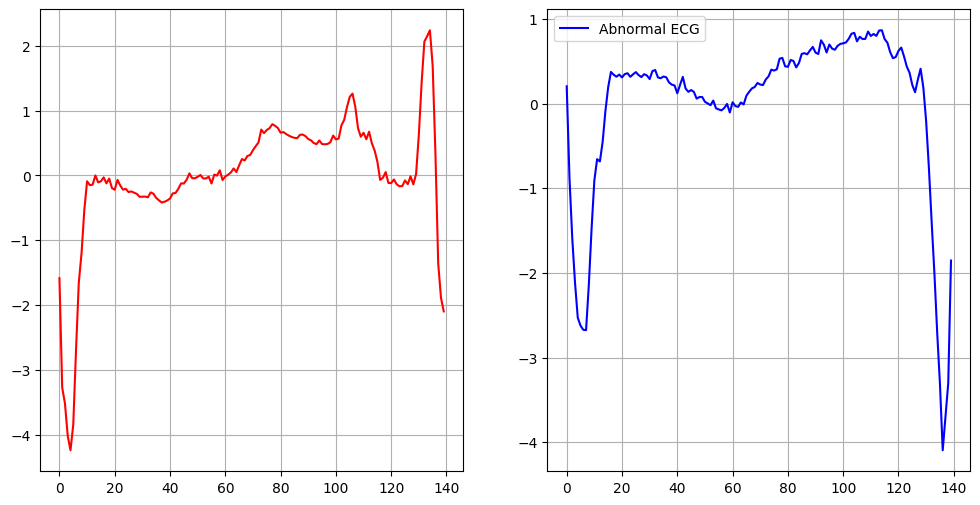

In [12]:
# Lets view a normal and an abnormal ECG

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.grid()
ax1.plot(np.arange(140), normal_train_df.iloc[0,:-1], color='red', label='Normal ECG')

ax2.grid()
ax2.plot(np.arange(140), test_df.iloc[0,:-1], color='blue', label='Abnormal ECG')

plt.legend(loc='best')
plt.show()

In [13]:
X_train = np.array(normal_train_df.iloc[:,:-1])
y_train = np.array(normal_train_df.iloc[:,-1])

X_test = np.array(test_df.iloc[:,:-1])
y_test = np.array(test_df.iloc[:,-1])

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2900, 140)
(2900,)
(2098, 140)
(2098,)


In [15]:
# Create and Train the model

from autoencoder import Autoencoder

input_size = X_train.shape[-1]
anomaly_detector = Autoencoder(input_size)

epochs = 200
batch_size = 200

anomaly_detector.compile(optimizer='Adam', loss='mae')
history = anomaly_detector.fit(X_train, X_train, epochs = epochs, batch_size=batch_size, validation_data=(X_test, X_test))

Epoch 1/200
15/15 [==============================] - 1s 13ms/step - loss: 0.6359 - val_loss: 0.6537
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.5050 - val_loss: 0.6252
Epoch 3/200
15/15 [==============================] - 0s 4ms/step - loss: 0.3772 - val_loss: 0.5989
Epoch 4/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2945 - val_loss: 0.5685
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2412 - val_loss: 0.5546
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2148 - val_loss: 0.5501
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1978 - val_loss: 0.5383
Epoch 8/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1828 - val_loss: 0.5275
Epoch 9/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1742 - val_loss: 0.5205
Epoch 10/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1694 - val_loss: 0.5168
Epoch 11

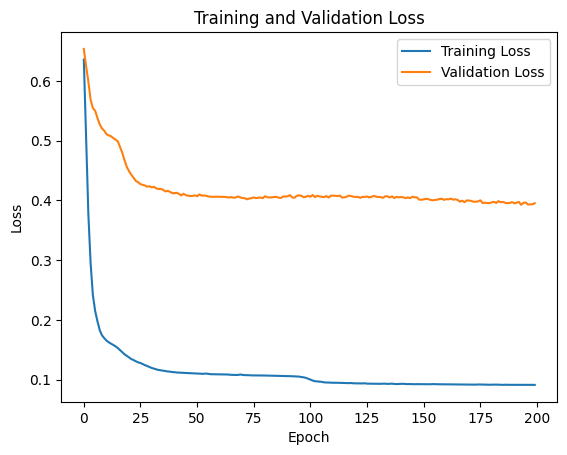

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
anomaly_detector.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 16)                11632     
                                                                 
 sequential_1 (Sequential)   (None, 140)               11756     
                                                                 
Total params: 23388 (91.36 KB)
Trainable params: 23388 (91.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


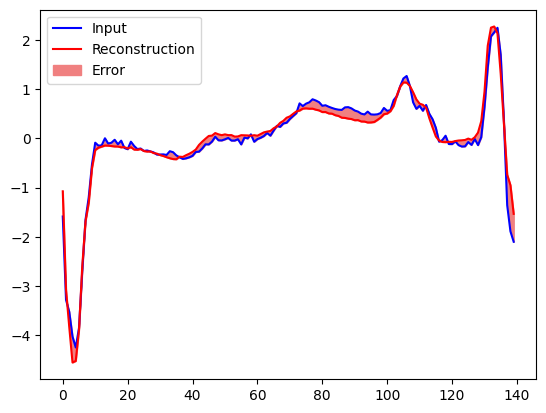

In [18]:
#Now let's define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  enc_img = anomaly_detector.encoder(data)
  dec_img = anomaly_detector.decoder(enc_img)
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

plot(X_train, 0)

In [19]:
# Evaluating on the test data
from classifier import Classifier
classifier1 = Classifier(anomaly_detector, X_train)

y_pred = classifier1.classify(X_test)

# Calculate the confusion matrix
conf_matrix = tf.math.confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix.numpy())

from sklearn.metrics import classification_report

# Assuming y_pred and y_test are arrays containing predicted and true labels respectively

# Generate the classification report
report = classification_report(y_test, y_pred)

print("\n")
print("Classification Report:")
print(report)

Confusion Matrix:
[[2076    3]
 [   0   19]]


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2079
         1.0       0.86      1.00      0.93        19

    accuracy                           1.00      2098
   macro avg       0.93      1.00      0.96      2098
weighted avg       1.00      1.00      1.00      2098

